In [102]:
# import dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [103]:
# set up twitter authentications
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [104]:
# initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [105]:
# identify target twitter accounts
targets = ['SamHarrisOrg', 'realDonaldTrump', 'TheRickWilson', 'jordanbpeterson', 'RealCandaceO']

In [106]:
# set up lists to hold the data from api calls and sentiment analysis
twitter_feed = []
source_account = []
text = []
date = []
counterlist = []
compound = []
positive = []
neutral = []
negative = []

In [107]:
#test = api.user_timeline(target, count=1, result_type="recent")
#name = test[0]["user"]["name"]
#print(json.dumps(test, sort_keys=True, indent=4))
#print(name)

In [108]:
# create loop to make api call and analyze the sentiment
for target in targets:
    
    #get the tweets from api call
    tweets = api.user_timeline(target, count=100, result_type="recent")
    # set a counter for establishing 'tweets ago'
    counter = 1
    
    # start the loop to collect and sort the data
    for tweet in tweets:
        twitter_feed.append(target)
        source_account.append(tweet["user"]["name"])
        text.append(tweet["text"])
        date.append(tweet["created_at"])
        counterlist.append(counter)
        
        #add to the counter
        counter += 1

In [109]:
# loop through the text of the tweets to analyze the sentiments
for data in text:
    
    # run the sentiment analysis on each tweet
    sentiment = analyzer.polarity_scores(data)
    
    # Add each value to the appropriate array
    positive.append(sentiment["pos"])
    negative.append(sentiment["neg"])
    neutral.append(sentiment["neu"])
    compound.append(sentiment["compound"])

In [112]:
# set up pandas dataframe
df = pd.DataFrame({
    "Twitter Feed": twitter_feed,
    "Source Account": source_account,
    "Tweet": text,
    "Tweet Date": date,
    "Compound Score": compound,
    "Positive Score": positive,
    "Neutral Score": neutral,
    "Negative Score": negative,
    "Tweets Ago": counterlist
})

# light data cleanup for a presentable dataframe
df = df[[ "Twitter Feed","Source Account", "Tweets Ago", "Tweet","Tweet Date","Compound Score","Positive Score","Neutral Score","Negative Score" ]]

df.head()

,Twitter Feed,Source Account,Tweets Ago,Tweet,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,SamHarrisOrg,Sam Harris,1,RT @at_RIN: Have you ever seen a sea like this...,Mon Jun 11 14:58:08 +0000 2018,0.6249,0.221,0.779,0.000
1,SamHarrisOrg,Sam Harris,2,"This is great, from @mashagessen: ""How George ...",Mon Jun 11 03:56:43 +0000 2018,0.6597,0.293,0.707,0.000
2,SamHarrisOrg,Sam Harris,3,RT @GenMhayden: This is madness https://t.co/i...,Mon Jun 11 00:06:50 +0000 2018,-0.4404,0.000,0.633,0.367
3,SamHarrisOrg,Sam Harris,4,RT @MaajidNawaz: I spoke out against the anti-...,Sun Jun 10 23:58:57 +0000 2018,-0.3182,0.141,0.664,0.195
4,SamHarrisOrg,Sam Harris,5,"Mark Zuckerberg, Elon Musk and the Feud Over K...",Sun Jun 10 20:21:22 +0000 2018,-0.7717,0.000,0.573,0.427


In [84]:
# save pandas dataframe to a csv file

In [113]:
# slice up the dataframe for easier plotting
df1 = df.iloc[0:100, [2,5]]
df2 = df.iloc[100:200, [2, 5]]
df3 = df.iloc[200:300,[2, 5]]
df4 = df.iloc[300:400, [2, 5]]
df5 = df.iloc[400:500,[2, 5]]
df4.head()

,Tweets Ago,Compound Score
300,1,0.4939
301,2,0.0000
302,3,0.0000
303,4,0.4588
304,5,-0.2732


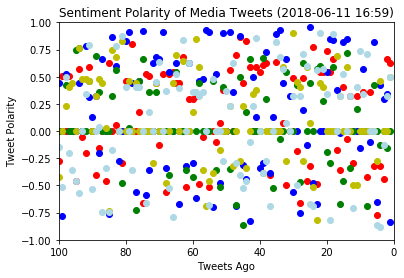

In [117]:
#set the time variables
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# plot the tweet sentiment analysis
plt.scatter(df1["Tweets Ago"], df1["Compound Score"], marker="o", color="r")
plt.scatter(df2["Tweets Ago"], df2["Compound Score"], marker="o", color="b")
plt.scatter(df3["Tweets Ago"], df3["Compound Score"], marker="o", color="g")
plt.scatter(df4["Tweets Ago"], df4["Compound Score"], marker="o", color="y")
plt.scatter(df5["Tweets Ago"], df5["Compound Score"], marker="o", color="lightblue")
plt.title(f"Sentiment Polarity of Media Tweets ({now})")
plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()